In [1]:
import pandas as pd
import numpy as np

In [2]:
#Load the dataset

df = pd.read_csv(r"H:\Machine Learning\PROJECTS\SMS-Spam-Detection\spam.csv", encoding='cp1252')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1003,ham,&lt;#&gt; am I think? Should say on syllabus,NaN,NaN,NaN
3880,ham,Can you plz tell me the ans. BSLVYL sent via f...,NaN,NaN,NaN
561,ham,Thanx 4 e brownie it's v nice...,NaN,NaN,NaN
272,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...,NaN,NaN,NaN
5239,ham,"Jay wants to work out first, how's 4 sound?",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
#1 Data Cleaning
#2 EDA
#3 Text Preprocessing
#4 Model Building
#5 Model Evaluation
#6 Improvements
#7 Web App
#8 Deployment

#1 Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
# drop last 3 columns

df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [8]:
df.sample(5)

,v1,v2
911,ham,I am sorry it hurt you.
4238,ham,"Sez, hows u & de arab boy? Hope u r all good g..."
4464,ham,\CHEERS FOR CALLIN BABE.SOZI CULDNT TALKBUT I ...
1115,ham,So lets make it saturday or monday as per conv...
1431,ham,My painful personal thought- \I always try to ...


In [9]:
#Renaming the columns

df.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [10]:
df.sample(5)

,target,text
5561,ham,Get me out of this dump heap. My mom decided t...
3326,ham,what number do u live at? Is it 11?
5222,ham,5 nights...We nt staying at port step liao...T...
1092,ham,Where r we meeting?
3468,ham,All day working day:)except saturday and sunday..


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
df['target'] = encoder.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
#check for null values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [16]:
#Rename the duplicate values

df = df.drop_duplicates(keep ='first')

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
df.shape

(5169, 2)

#2 EDA

In [19]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

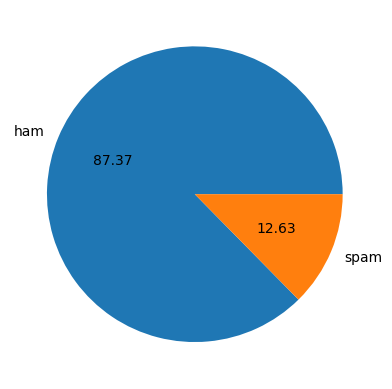

In [21]:
import matplotlib.pyplot as plt

plt.pie(df['target'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f')
plt.show()

Data is imbalanced

In [22]:
# Checking number of text, words and sentences in the text column.

In [23]:
import re
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# Count number of characters
df['num_characters'] = df['text'].apply(len)

<IPython.core.display.Javascript object>

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ebad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [25]:
# Count number of words
df['num_words'] = df['text'].apply(lambda x: len(x.split()))

In [26]:
df.head(5)

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,20
1,0,Ok lar... Joking wif u oni...,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28
3,0,U dun say so early hor... U c already then say...,49,11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13


In [27]:
# Count sentences using regex
df['num_sentences'] = df['text'].apply(lambda x: len(re.findall(r'[.!?]+', x)))

In [28]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3
1,0,Ok lar... Joking wif u oni...,29,6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1
3,0,U dun say so early hor... U c already then say...,49,11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0


In [29]:
df[['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,1.846779
std,58.236293,11.068488,1.745441
min,2.000000,1.000000,0.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


In [30]:
#ham messages
df[df['target'] == 0][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.692648
std,56.358207,11.116240,1.681598
min,2.000000,1.000000,0.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [31]:
#spam messages
df[df['target'] == 1][['num_characters', 'num_words', 'num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,2.912711
std,30.137753,5.967672,1.806610
min,13.000000,2.000000,0.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

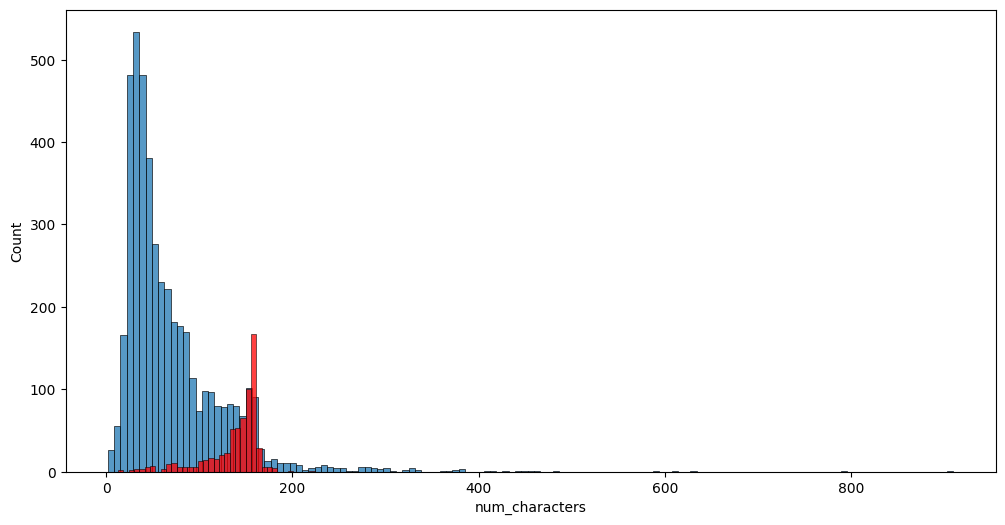

In [33]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'], color = 'red')


<Axes: xlabel='num_words', ylabel='Count'>

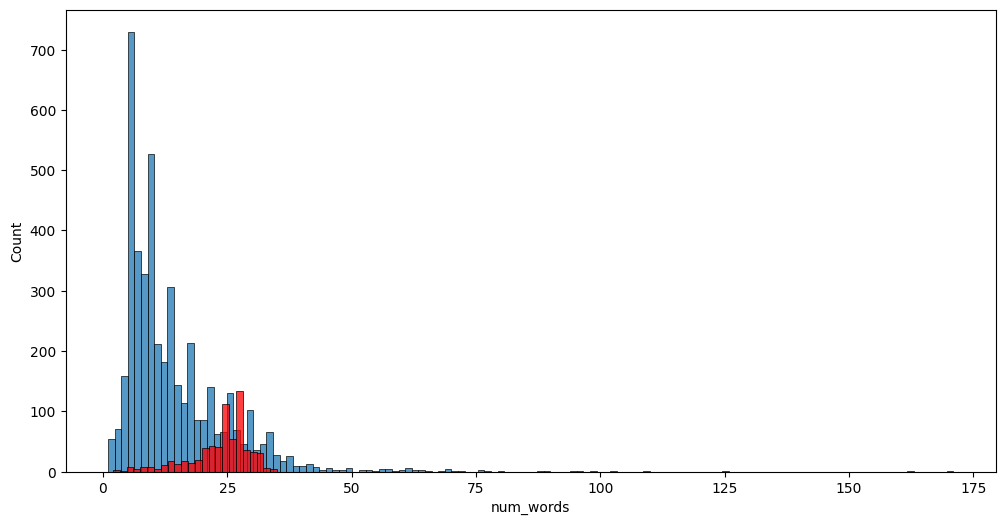

In [34]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

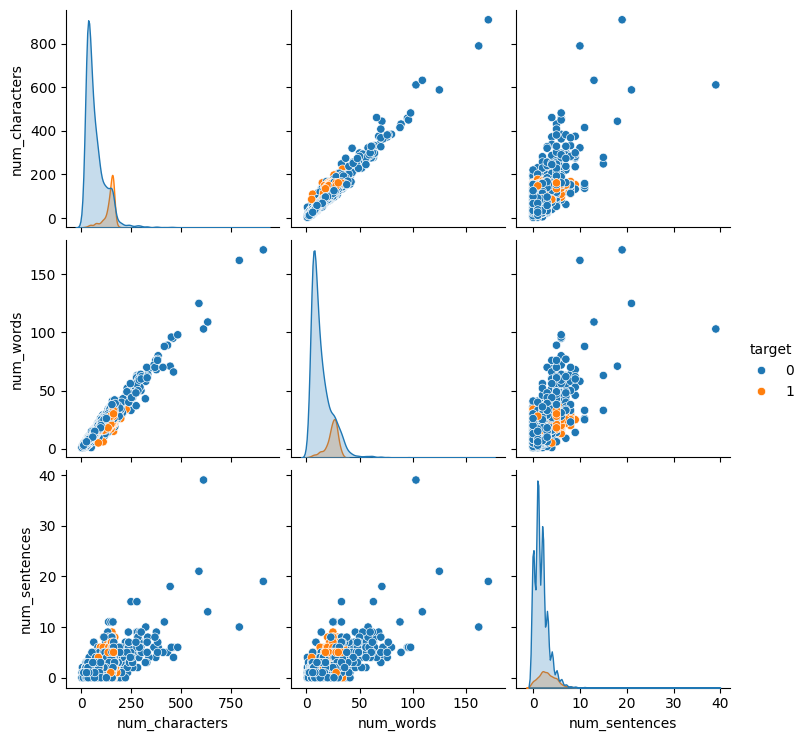

In [35]:
sns.pairplot(df, hue = 'target')

<Axes: >

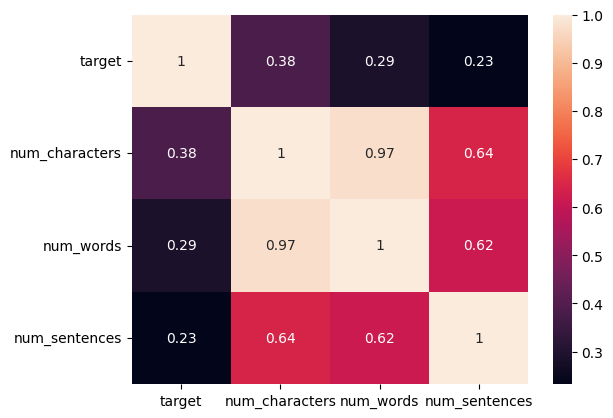

In [36]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

#3 Text Preprocessing

1 - Lower Case,
2 - Tokenization,
3 - Removing spaecial characters,
4 - Removing stop words and puctuations,
5 - Stemming.

In [37]:
import re
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.porter import PorterStemmer  # Optional — explained below

ps = PorterStemmer()

def transform_text(text):
    # Lowercase
    text = text.lower()
    
    # Remove special characters and keep only words and numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    
    # Tokenization
    tokens = text.split()
    
    # Remove stopwords
    tokens = [word for word in tokens if word not in ENGLISH_STOP_WORDS]
    
    # Stemming
    tokens = [ps.stem(word) for word in tokens]

    return " ".join(tokens)


In [38]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [39]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...')

'jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [40]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [41]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

'im gonna home soon dont want talk stuff anymor tonight k ive cri today'

In [42]:
df['transformed_text'] = df['text'].apply(transform_text)

In [43]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,20,3,jurong point crazi avail bugi n great world la...
1,0,Ok lar... Joking wif u oni...,29,6,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,28,1,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,11,2,u dun say earli hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,13,0,nah dont think goe usf live


In [44]:
#wordcloud
from wordcloud import WordCloud
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [45]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=' '))

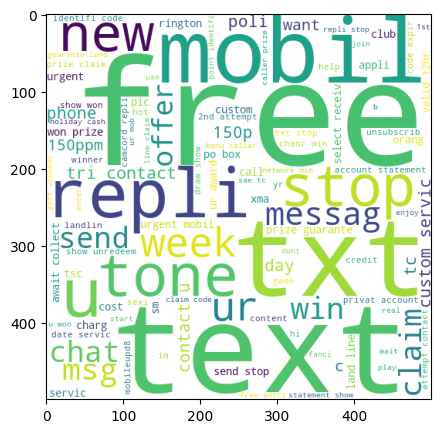

In [46]:
plt.figure(figsize = (10, 5))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=' '))

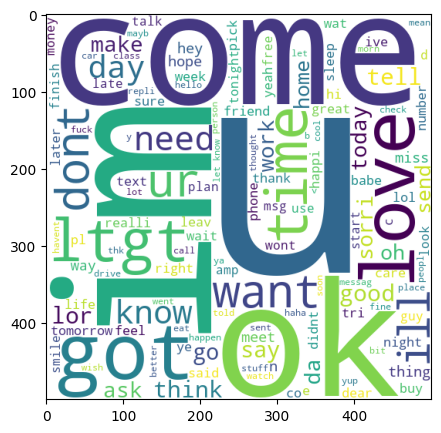

In [48]:
plt.figure(figsize = (10, 5))
plt.imshow(ham_wc)

In [49]:
#top 30 words in spam messages

spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [50]:
len(spam_corpus)

10109

C:\Users\Ebad\AppData\Local\Temp\ipykernel_18032\1701674378.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=spam_freq, palette='Reds_r')


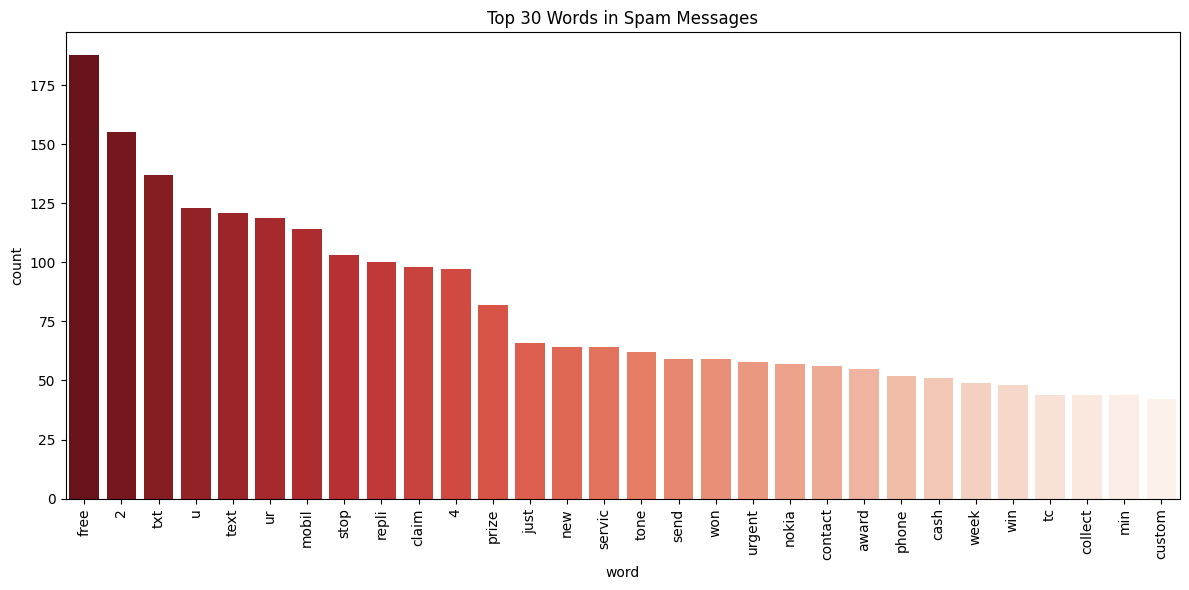

In [51]:
from collections import Counter

# Prepare top 30 spam words as a DataFrame
spam_freq = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=spam_freq, palette='Reds_r')
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Messages")
plt.tight_layout()
plt.show()


In [52]:
#top 30 words in ham messages

ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [53]:
len(ham_corpus)

33315

C:\Users\Ebad\AppData\Local\Temp\ipykernel_18032\827298230.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='word', y='count', data=ham_freq, palette='Reds_r')


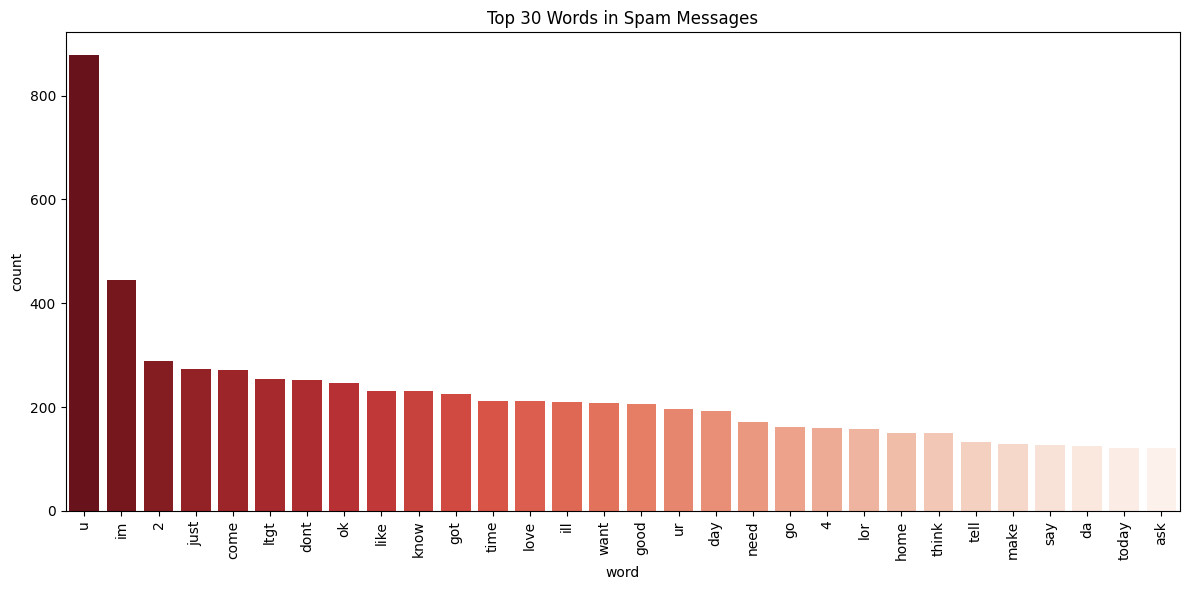

In [54]:
# Prepare top 30 ham words as a DataFrame
ham_freq = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='word', y='count', data=ham_freq, palette='Reds_r')
plt.xticks(rotation='vertical')
plt.title("Top 30 Words in Spam Messages")
plt.tight_layout()
plt.show()

#4 Model Building

#Text vectorization

#Using Bag of Words

In [55]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer
tfidf = TfidfVectorizer()

In [56]:
#X = cv().fit_transform(df['transformed_text']).toarray()
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [57]:
X.shape

(5169, 7878)

In [58]:
y = df['target'].values

In [59]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

In [61]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [62]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8665377176015474
[[779 117]
 [ 21 117]]
0.5


In [63]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


In [64]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


*Choosed tfidf ---> MNB due to precision*

In [65]:
# Importing various classifiers for model building
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [66]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [67]:
# Objects for various classifiers
svc = SVC(kernel = 'sigmoid', gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear', penalty = 'l1')
rfc = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
abc = AdaBoostClassifier(n_estimators=50, random_state=2, algorithm='SAMME')
bc = BaggingClassifier(n_estimators = 50, random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50, random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50, random_state = 2)
xgb = XGBClassifier(n_estimators = 50, random_state = 2)

In [68]:
# Dictionary of classifiers KEYS - name of Algo and VALUES - object of the Algo
clfs = {
    'SVC': svc,
    'KN': knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT': gbdt,
    'xgb': xgb
}

In [69]:
#define a function to train and evaluate the classifiers

def train_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)

    return accuracy, precision

In [70]:
train_classifier(svc, X_train, X_test, y_train, y_test)

(0.9738878143133463, np.float64(0.9743589743589743))

In [71]:
# Train and evaluate all classifiers
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():

    current_accuracy, current_precision = train_classifier(clf, X_train, X_test, y_train, y_test)

    print("For", name)
    print("Accuracy:", current_accuracy)
    print("Precision:", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy: 0.9738878143133463
Precision: 0.9743589743589743
For KN
Accuracy: 0.8965183752417795
Precision: 1.0
For NB
Accuracy: 0.9593810444874274
Precision: 1.0
For DT
Accuracy: 0.9284332688588007
Precision: 0.8404255319148937
For LR
Accuracy: 0.9477756286266924
Precision: 0.92
For RF
Accuracy: 0.971953578336557
Precision: 1.0
For AdaBoost
Accuracy: 0.9032882011605415
Precision: 0.9130434782608695
For BgC
Accuracy: 0.9642166344294004
Precision: 0.9243697478991597
For ETC
Accuracy: 0.9729206963249516
Precision: 0.9741379310344828
For GBDT
Accuracy: 0.9497098646034816
Precision: 0.9886363636363636
For xgb
Accuracy: 0.9709864603481625
Precision: 0.9576271186440678


In [73]:
# Create a DataFrame to store the performance of each classifier
performance_df = pd.DataFrame({
    'Algorithm': list(clfs.keys()),
    'Accuracy': accuracy_scores,
    'Precision': precision_scores
}).sort_values('Precision', ascending=False)


In [74]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.896518,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
9,GBDT,0.949710,0.988636
0,SVC,0.973888,0.974359
8,ETC,0.972921,0.974138
10,xgb,0.970986,0.957627
7,BgC,0.964217,0.924370
4,LR,0.947776,0.920000
6,AdaBoost,0.903288,0.913043


In [76]:
performance_long = pd.melt(performance_df, id_vars=['Algorithm'], value_vars=['Accuracy', 'Precision'])

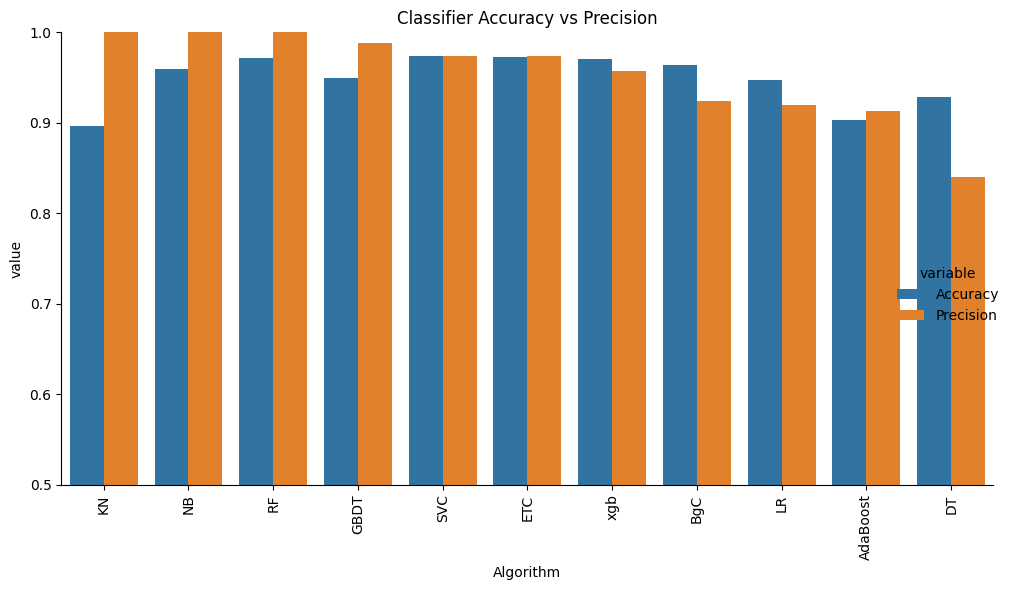

In [77]:
sns.catplot(
    x='Algorithm',
    y='value',
    hue='variable',
    data=performance_long,
    kind='bar',
    height=6,
    aspect=1.5
)

plt.ylim(0.5, 1.0)
plt.xticks(rotation='vertical')
plt.title("Classifier Accuracy vs Precision")
plt.tight_layout()
plt.show()


In [78]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))